In [ ]:
import pandas as pd
jokes=pd.read_csv("/content/jokes.csv")
test=pd.read_csv("/content/test.csv")
train=pd.read_csv("/content/train.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092059 entries, 0 to 1092058
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   id       1092059 non-null  object 
 1   user_id  1092059 non-null  int64  
 2   joke_id  1092059 non-null  int64  
 3   Rating   1092059 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 33.3+ MB


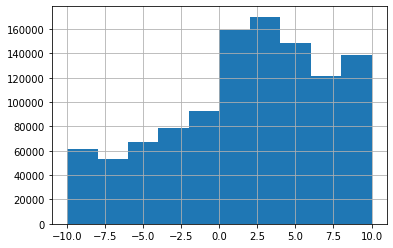

In [ ]:
train['Rating'].hist()

In [ ]:
train['Count']=train.groupby('joke_id')['Rating'].transform('nunique')

In [ ]:
pip install surprise

     |████████████████████████████████| 11.8MB 330kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617622 sha256=ae800113d63e9f586f91ba29b05714156da773bf06a5786b5050c16bb198a3e8
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import Reader, Dataset, SVD
from surprise.model_selection.validation import cross_validate
from surprise.model_selection import GridSearchCV
from surprise.model_selection import train_test_split

In [ ]:
reader=Reader(rating_scale=(-10,10))
data = Dataset.load_from_df(train[['user_id', 'joke_id', 'Rating']], reader)
train_set,test_set=train_test_split(data,test_size=0.2)

In [ ]:
pg_svd={'n_epochs':[10,25,50],'lr_all':[0.001,0.005,0.01],'reg_all':[0.1,0.4,0.08]}
gs_svd=GridSearchCV(SVD,pg_svd,measures=['rmse'],cv=3)
gs_svd.fit(data)

In [ ]:
print(gs_svd.best_score['rmse']),print(gs_svd.best_params['rmse'])

In [ ]:
svd=SVD(n_epochs=25,lr_all=0.001,reg_all=0.1,random_state=123)
svd.fit(train_set)

In [ ]:
predictions=svd.test(test_set)

In [ ]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 4.0432


4.043230229704762

In [ ]:
test_prediction=[(test.iloc[i,0],test.iloc[i,1],test.iloc[i,2],
                  svd.predict(test.iloc[i,1],test.iloc[i,2]).est) for i in range(test.shape[0]) ]

In [ ]:
TestDF=pd.DataFrame(test_prediction,columns=['id','user_id','joke_id','Rating'])

In [ ]:
TestDF.to_csv("test.csv",index=False,header=TestDF.columns)

In [ ]:
TestDF.head(5)

,id,user_id,joke_id,Rating
0,6194_11,6194,11,1.608783
1,19356_3,19356,3,-2.607187
2,23426_79,23426,79,5.174349
3,40030_3,40030,3,-4.954772
4,19806_115,19806,115,6.123195


In [ ]:
TestDF.to_csv('./submission_utkarsh.csv',index=False)